In [2]:
#Brett Floyd 
#Partcipation Assignment 5

#Question 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [20]:
df_pitches = pd.read_csv('pitches.csv')
df_pitches.shape


(2867154, 40)

In [21]:
df_pitches.head(3)


df_pitches = df_pitches.sample(frac=0.01, random_state=1)
df_pitches.shape

(28672, 40)

<Axes: xlabel='spin_rate', ylabel='break_length'>

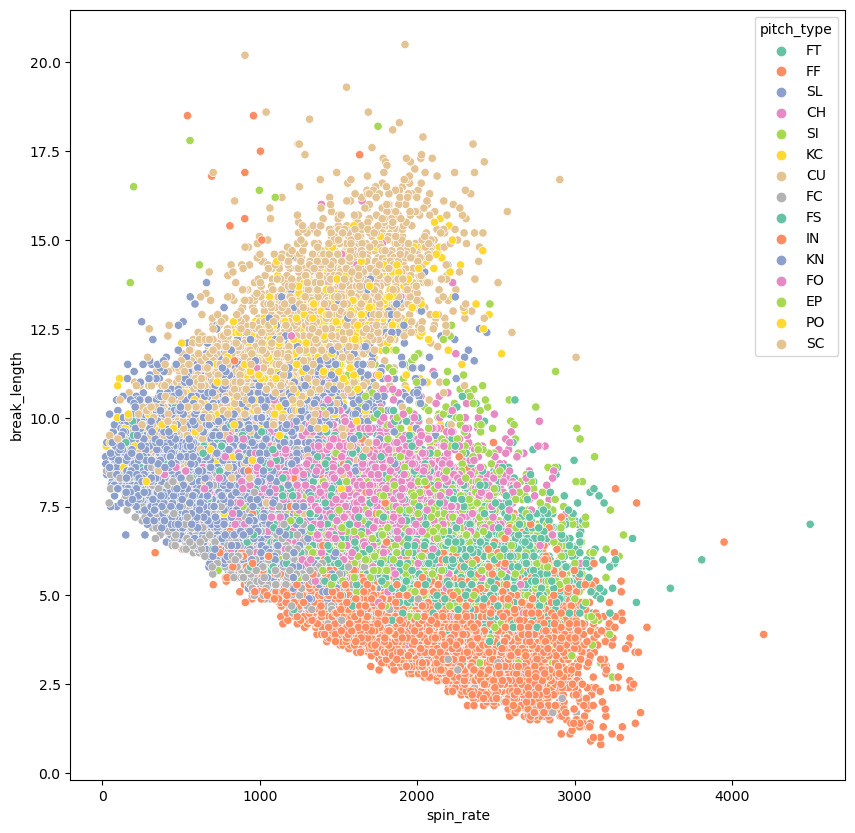

In [38]:

#Question 2
plt.figure(1 , figsize = (25, 25) )
sns.scatterplot(
    data=df_pitches,
    x="spin_rate",
    y="break_length",
    hue="pitch_type",
    palette="Set2",
    
)

In [23]:
columns_to_keep = ['break_length', 'spin_rate']
df =  df_pitches[columns_to_keep]
df.dropna(inplace=True)



/var/folders/8q/72fnhfzj0rd18phk_96l8kc80000gn/T/ipykernel_33614/546400911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [24]:

X = df
X_norm = preprocessing.normalize(X)


In [25]:
index=np.random.randint(28672, size=7)
reps=np.array([X_norm[index[0]], X_norm[index[1]], X_norm[index[2]], X_norm[index[3]], X_norm[index[4]], X_norm[index[5]], X_norm[index[6]]])



In [26]:
#Question 5

#Group Assignment
def group_assignment(data,centroids):
    grouping_vec_c = np.zeros(len(data))
    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])
            min_dist = min(dist)
        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1
    return grouping_vec_c
#Update representatives/centroids
def update_centroid(data, grouping, centroids):
    new_centroids = [];
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids        

In [27]:
def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj

In [28]:
#Run the k-means algorithm
def Kmeans_alg(data, centroids):
    iteration = 0
    J_obj_vector = []
    Stop = False
    while Stop == False:
        grouping = group_assignment(data, centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objective(data, grouping, new_centroids)
        J_obj_vector.append(J_obj)
        iteration += 1
        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
            Stop = True
        else:
            centroids = new_centroids
    return new_centroids, grouping, J_obj_vector, iteration

In [30]:
#Question 6
[new_centroids, grouping, J_obj_vector, iteration] = Kmeans_alg(X_norm, reps)


<Axes: xlabel='spin_rate', ylabel='break_length'>

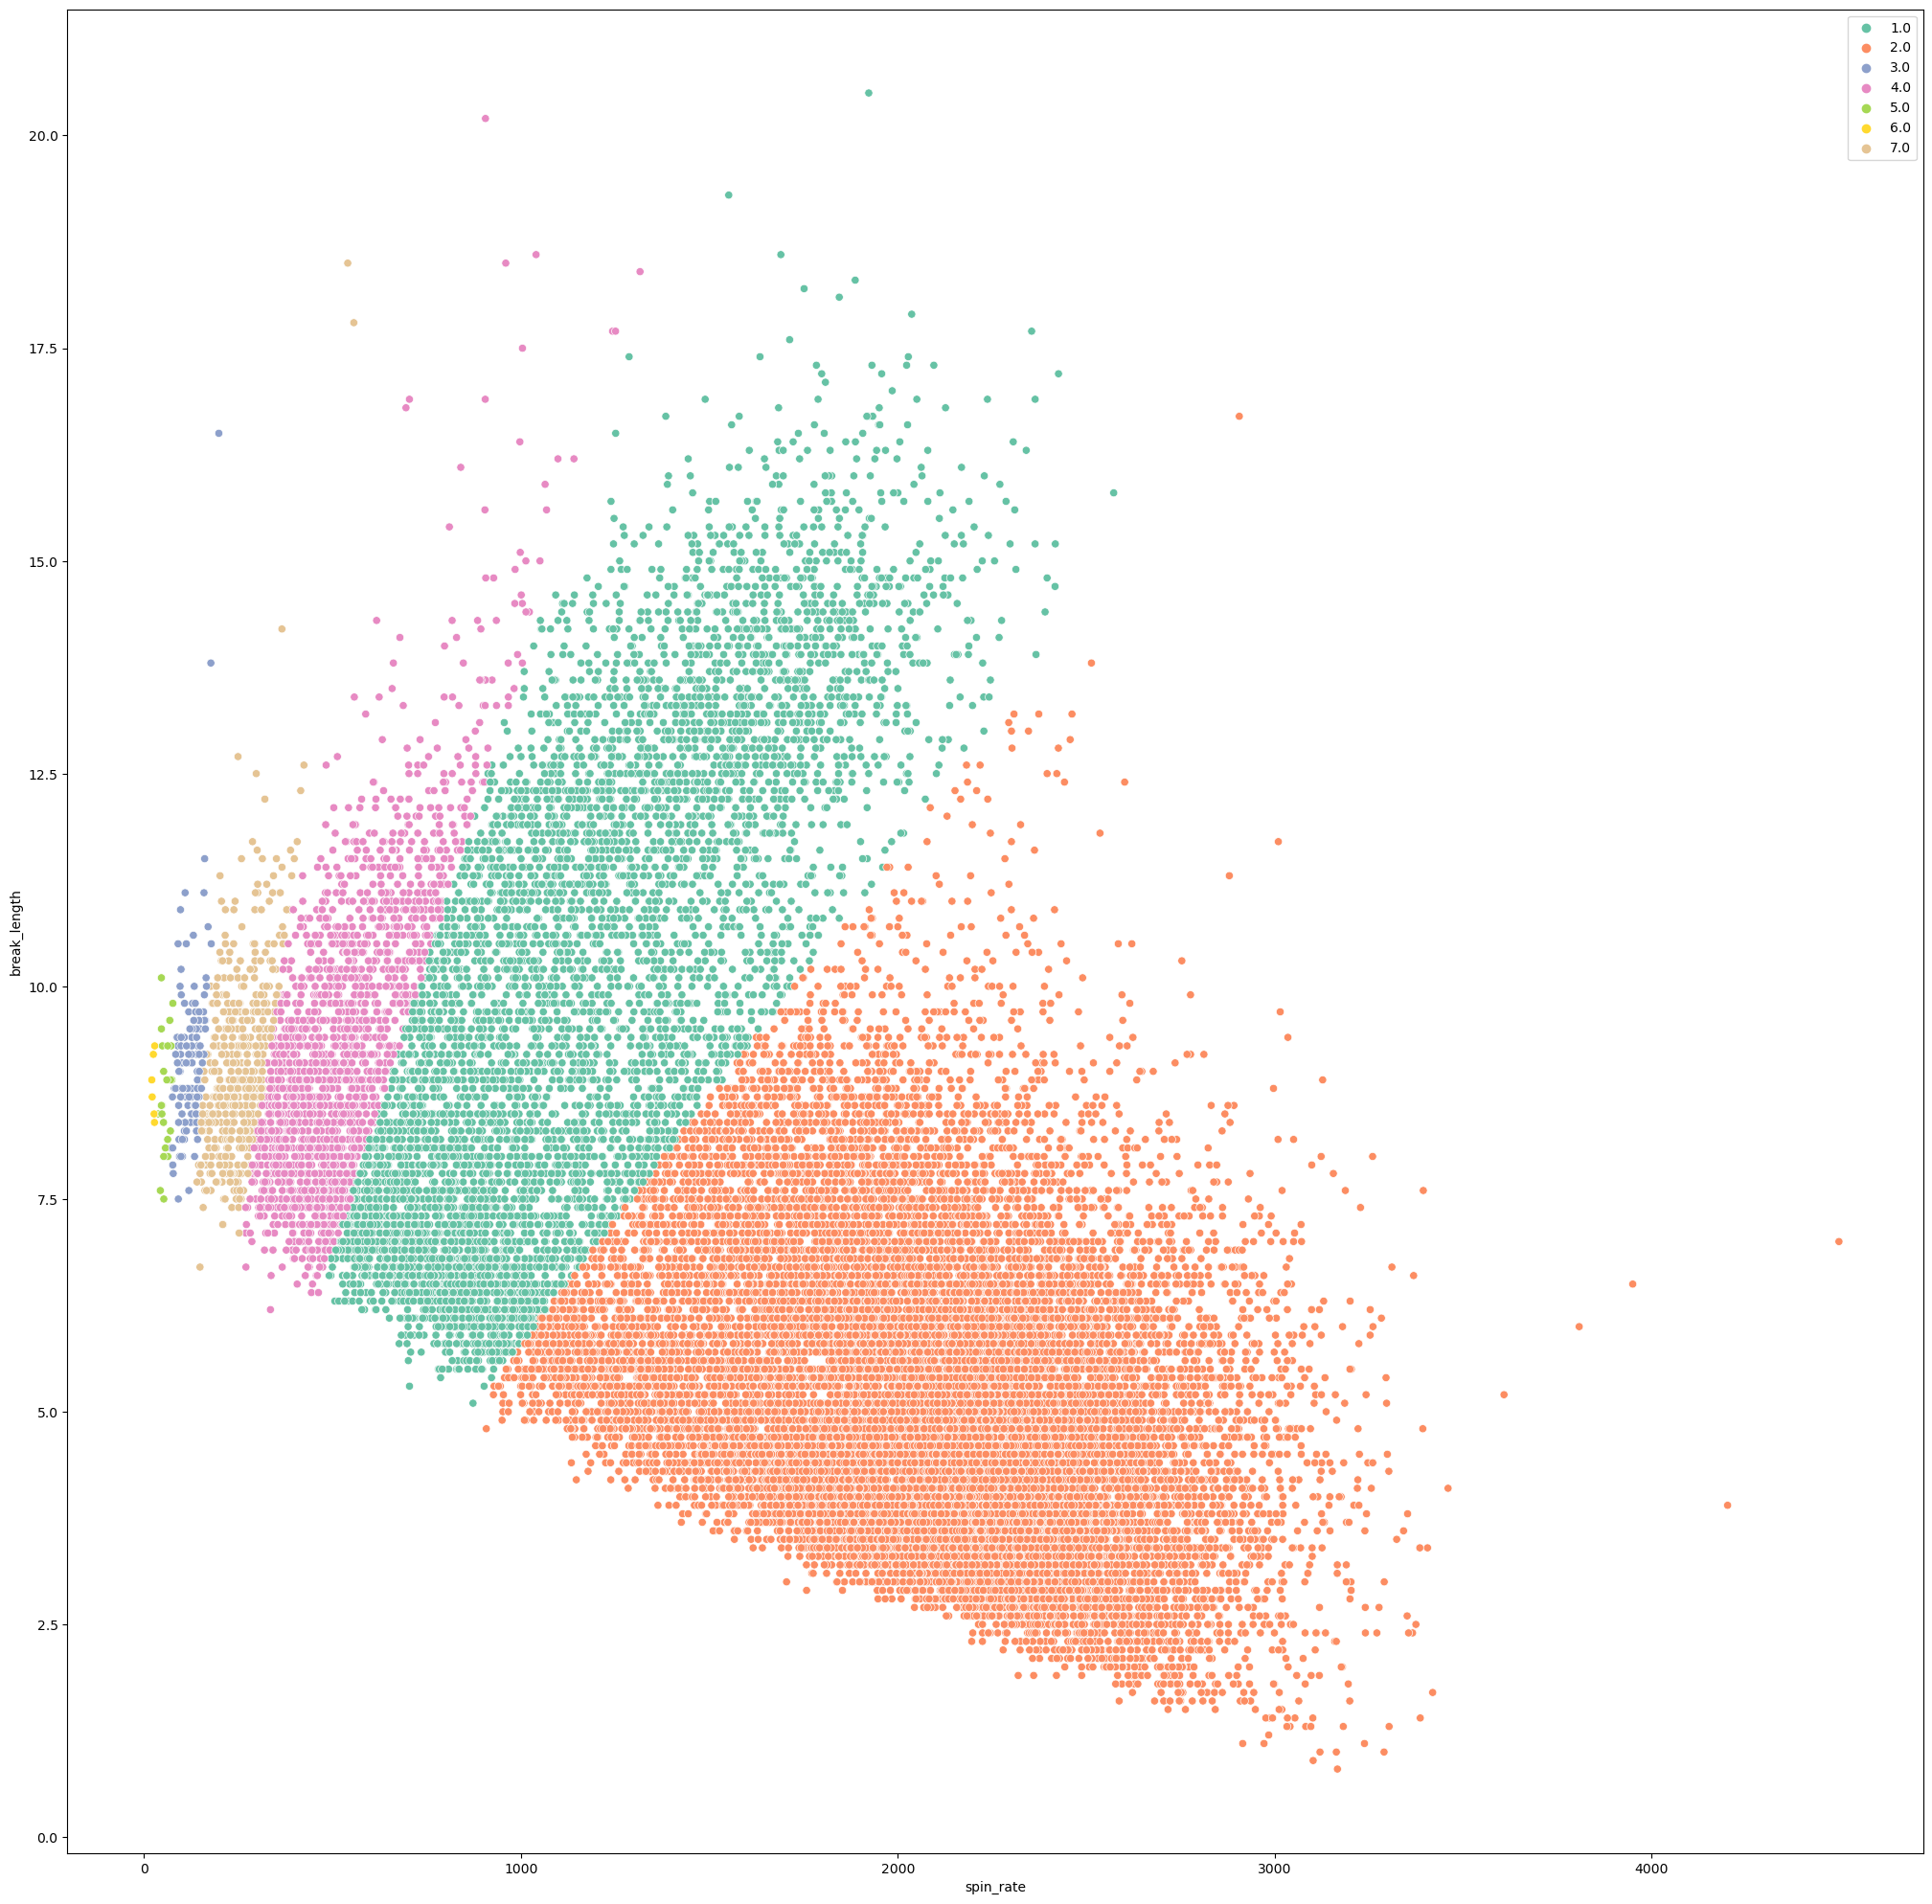

In [34]:
labels=grouping


plt.figure(1 , figsize = (25 , 25))
sns.scatterplot(data = X, x = 'spin_rate', y = 'break_length', hue = labels, palette="Set2")

#k = 3

/Users/brettfloyd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/brettfloyd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/brettfloyd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/brettfloyd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

1 : 1734.2462140408709
2 : 943.9283211486298
3 : 746.0853341304842
4 : 625.8981268605642
5 : 536.2897711787632
6 : 476.3507131062033
7 : 422.3314484229091
8 : 417.64988507900534
9 : 389.95303370316736


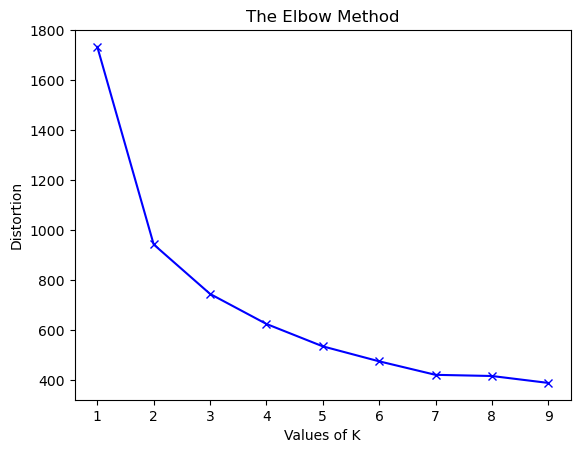

In [39]:
 
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_norm)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_norm.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_norm.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()
